In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#NOTE - change 'size' back to 1500 just prior to submission
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
# code to use sample set of cities to develop program and not overuse OpenWeather API
#testcities = []
#for i in range(60):
 #   testcities.append(cities[i])
  #  print(cities[i])
    
#print(testcities)

In [5]:
# code to utilize OpenWeather API to get data for weather in cities across the world.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# from starter code: 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url = f"{url}appid={backup_weather_api_key}&q="

In [6]:
# code to pull request for data from OpenWeather and put it into a data frame.  Also, use loop to create processing log.
 
city_data = []
y = 10
count = 0
set = 1
for city in cities:
    response = requests.get(query_url + city)
    response = requests.get(query_url + city).json()
    info_response = response
    #print(info_response)
        
    try:
        latitudes = info_response['coord']['lat']
        longitudes = info_response['coord']['lon']
        temps = info_response['main']['temp_max']
        humidity = info_response['main']['humidity']
        cloudiness = info_response['clouds']['all']
        windspeed = info_response['wind']['speed']
        country = info_response['sys']['country']
        date = info_response['dt']
        name_city = info_response['name']
        city_data.append({
            "City": name_city,
            "Lat": latitudes,
            "Lng": longitudes,
            "Max Temp": temps,
            "Cloudiness": cloudiness,
            "Windspeed": windspeed,
            "Date": date,
            "Country": country,
            "Humidity": humidity
        })
        count = count + 1
        print(f"This is city {count} of set {set} of {y}: {city}, processing")
        if count == 60:
            time.sleep(120)
            set = set + 1
            count = 0
        
    except KeyError:
        
        print(f"{city} is not found on OpenWeather, skipping....")
    
     
   

This is city 1 of set 1 of 60: cape town, processing
This is city 2 of set 1 of 60: port elizabeth, processing
illoqqortoormiut is not found on OpenWeather, skipping....
belushya guba is not found on OpenWeather, skipping....
This is city 3 of set 1 of 60: kapaa, processing
This is city 4 of set 1 of 60: hithadhoo, processing
This is city 5 of set 1 of 60: popondetta, processing
This is city 6 of set 1 of 60: mataura, processing
This is city 7 of set 1 of 60: upernavik, processing
This is city 8 of set 1 of 60: la rioja, processing
This is city 9 of set 1 of 60: nago, processing
This is city 10 of set 1 of 60: araouane, processing
This is city 11 of set 1 of 60: lebu, processing
This is city 12 of set 1 of 60: ushuaia, processing
This is city 13 of set 1 of 60: barber, processing
This is city 14 of set 1 of 60: muros, processing
riaba is not found on OpenWeather, skipping....
This is city 15 of set 1 of 60: spokane, processing
This is city 16 of set 1 of 60: tilichiki, processing
This 

This is city 21 of set 3 of 60: teruel, processing
This is city 22 of set 3 of 60: adrar, processing
This is city 23 of set 3 of 60: nambucca heads, processing
This is city 24 of set 3 of 60: bandarbeyla, processing
This is city 25 of set 3 of 60: plettenberg bay, processing
This is city 26 of set 3 of 60: ossora, processing
This is city 27 of set 3 of 60: beringovskiy, processing
sentyabrskiy is not found on OpenWeather, skipping....
This is city 28 of set 3 of 60: mahebourg, processing
This is city 29 of set 3 of 60: souillac, processing
This is city 30 of set 3 of 60: geraldton, processing
This is city 31 of set 3 of 60: bossier city, processing
This is city 32 of set 3 of 60: holden, processing
This is city 33 of set 3 of 60: norman wells, processing
This is city 34 of set 3 of 60: qeshm, processing
This is city 35 of set 3 of 60: linxia, processing
toliary is not found on OpenWeather, skipping....
This is city 36 of set 3 of 60: campbell river, processing
This is city 37 of set 3 

This is city 41 of set 5 of 60: esperance, processing
This is city 42 of set 5 of 60: gat, processing
This is city 43 of set 5 of 60: hailar, processing
This is city 44 of set 5 of 60: vardo, processing
This is city 45 of set 5 of 60: cherskiy, processing
This is city 46 of set 5 of 60: acarau, processing
This is city 47 of set 5 of 60: ribeira grande, processing
This is city 48 of set 5 of 60: los llanos de aridane, processing
This is city 49 of set 5 of 60: port blair, processing
This is city 50 of set 5 of 60: banda aceh, processing
This is city 51 of set 5 of 60: tazovskiy, processing
This is city 52 of set 5 of 60: russell, processing
This is city 53 of set 5 of 60: kurumkan, processing
This is city 54 of set 5 of 60: talnakh, processing
This is city 55 of set 5 of 60: rybnaya sloboda, processing
marcona is not found on OpenWeather, skipping....
This is city 56 of set 5 of 60: stratford, processing
This is city 57 of set 5 of 60: trairi, processing
This is city 58 of set 5 of 60: 

This is city 5 of set 8 of 60: yuci, processing
This is city 6 of set 8 of 60: grindavik, processing
This is city 7 of set 8 of 60: oxbow, processing
This is city 8 of set 8 of 60: asfi, processing
This is city 9 of set 8 of 60: maceio, processing
This is city 10 of set 8 of 60: bandar-e lengeh, processing
barbar is not found on OpenWeather, skipping....
This is city 11 of set 8 of 60: bowen, processing
This is city 12 of set 8 of 60: bela, processing
This is city 13 of set 8 of 60: tallahassee, processing
This is city 14 of set 8 of 60: nouadhibou, processing
sorvag is not found on OpenWeather, skipping....
This is city 15 of set 8 of 60: narsaq, processing
This is city 16 of set 8 of 60: farafangana, processing
This is city 17 of set 8 of 60: rundu, processing
This is city 18 of set 8 of 60: san jeronimo, processing
This is city 19 of set 8 of 60: kavaratti, processing
satitoa is not found on OpenWeather, skipping....
This is city 20 of set 8 of 60: manoel urbano, processing
This is 

In [7]:
# Print pandas showing all data points collected.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Cloudiness,Windspeed,Date,Country,Humidity
0,Cape Town,-33.93,18.42,59.00,0,14.99,1604191961,ZA,58
1,Port Elizabeth,-33.92,25.57,64.40,75,8.05,1604191961,ZA,88
2,Kapaa,22.08,-159.32,82.40,75,8.05,1604191961,US,65
3,Hithadhoo,-0.60,73.08,83.89,100,8.52,1604191608,MV,69
4,Popondetta,-8.75,148.25,92.75,87,3.33,1604191962,PG,48
...,...,...,...,...,...,...,...,...,...
541,Barreiras,-12.15,-44.99,72.28,95,1.72,1604193185,BR,89
542,Cayenne,4.93,-52.33,77.00,40,1.12,1604192894,GF,100
543,Zhuhai,22.28,113.57,77.00,40,5.82,1604193082,CN,73
544,Kota Belud,6.35,116.43,82.40,20,4.70,1604193185,MY,78


In [8]:
# code to Save a CSV of all retrieved data.
city_data_df.to_csv('output_data/WeatherPy_cities.csv')

In [9]:
#  code to collect the indices of cities in list that have humidity over 100%.
high_humidity = city_data_df.loc[city_data_df["Humidity"] >= 100, :]
high_humidity



,City,Lat,Lng,Max Temp,Cloudiness,Windspeed,Date,Country,Humidity
25,Nikolskoye,59.70,30.79,34.00,90,4.47,1604191966,RU,100
44,Fortuna,40.60,-124.16,53.01,90,6.93,1604191380,US,100
45,Manavālakurichi,8.13,77.30,78.80,20,3.89,1604191971,IN,100
76,Ranong,9.97,98.63,75.20,20,1.23,1604192098,TH,100
77,Lugo,43.00,-7.50,63.00,100,7.99,1604192098,ES,100
85,Yellowknife,62.46,-114.35,21.99,90,10.29,1604191895,CA,100
110,Alghero,40.56,8.32,55.99,11,4.70,1604192105,IT,100
193,Iisalmi,63.56,27.19,35.60,90,6.93,1604192363,FI,100
281,Kiryat Gat,31.61,34.76,72.00,94,1.12,1604192504,IL,100
299,Klaksvík,62.23,-6.59,44.60,92,33.33,1604192470,FO,100


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
noHighHumidity = city_data_df

index_humidity = noHighHumidity[noHighHumidity['Humidity'] >= 100 ].index

# Delete these row indexes from dataFrame
clean_city_data = noHighHumidity.drop(index_humidity , inplace=False)

In [11]:
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Verify that the 100% humidity cities have been removed from data frame
clean_city_data


,City,Lat,Lng,Max Temp,Cloudiness,Windspeed,Date,Country,Humidity
0,Cape Town,-33.93,18.42,59.00,0,14.99,1604191961,ZA,58
1,Port Elizabeth,-33.92,25.57,64.40,75,8.05,1604191961,ZA,88
2,Kapaa,22.08,-159.32,82.40,75,8.05,1604191961,US,65
3,Hithadhoo,-0.60,73.08,83.89,100,8.52,1604191608,MV,69
4,Popondetta,-8.75,148.25,92.75,87,3.33,1604191962,PG,48
...,...,...,...,...,...,...,...,...,...
540,São Francisco de Assis,-29.55,-55.13,60.04,0,12.71,1604193185,BR,74
541,Barreiras,-12.15,-44.99,72.28,95,1.72,1604193185,BR,89
543,Zhuhai,22.28,113.57,77.00,40,5.82,1604193082,CN,73
544,Kota Belud,6.35,116.43,82.40,20,4.70,1604193185,MY,78


In [12]:
# Output cleaned up data frame file to CSV
clean_city_data.to_csv("output_data/WeatherPy_cleancities.csv")

In [13]:
# code to get better understanding of the cleaned up data set
clean_city_data.describe()


,Lat,Lng,Max Temp,Cloudiness,Windspeed,Date,Humidity
count,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02,530.000000
mean,18.759755,19.958189,57.506604,48.007547,7.799981,1.604192e+09,73.452830
std,33.417610,88.523009,22.773623,41.277153,5.425944,3.764138e+02,19.579865
min,-54.800000,-175.200000,-10.890000,0.000000,0.270000,1.604192e+09,13.000000
25%,-9.070000,-55.077500,43.162500,1.000000,3.360000,1.604192e+09,63.000000
50%,21.435000,24.190000,62.670000,40.500000,6.930000,1.604192e+09,78.000000
75%,47.657500,96.352500,76.057500,93.000000,11.012500,1.604193e+09,88.000000
max,78.220000,179.320000,92.750000,100.000000,33.330000,1.604193e+09,99.000000


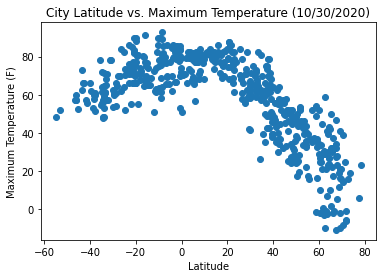

In [14]:
#12 different plots
#Plot 1 - Latitude vs. Temperature Plot (shows the relationship between Latitude and temperature)
# ...of the cities for which we have data - "Duh - it gets hotter! It really does! as you get closer to the equator."
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])
plt.title("City Latitude vs. Maximum Temperature (10/30/2020)")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.plot
plt.savefig("output_data/plot1.png")

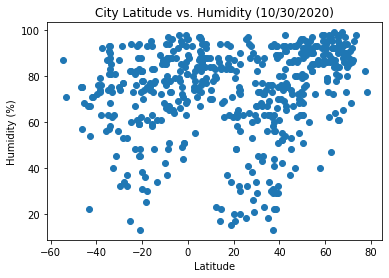

In [15]:
#Plot 2 - Latitude vs. Humidity Plot (this graph does not suggest a relationship between latitude and humidity.)
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])
plt.title("City Latitude vs. Humidity (10/30/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.plot
plt.savefig("output_data/plot2.png")

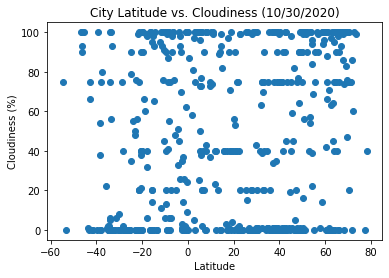

In [16]:
#Plot 3 - Latitude vs. Cloudiness Plot (this graph does not suggest any relationship between latitude and cloudiness.)
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (10/30/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.plot
plt.savefig("output_data/plot3.png")

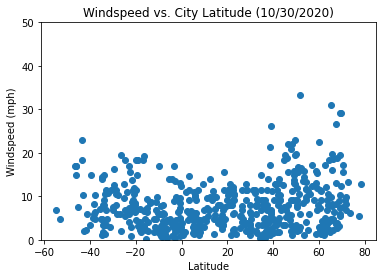

In [17]:
#Plot 4 - Latitude vs. Windspeed Plot 
plt.scatter(clean_city_data["Lat"],clean_city_data["Windspeed"])
plt.ylim(0,50)
plt.title("Windspeed vs. City Latitude (10/30/2020)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.plot
plt.savefig("output_data/plot4.png")

In [18]:
# code to group data for latitudes in the northern hemisphere and southern hemisphere into their own dataframes.
Northern = clean_city_data.loc[clean_city_data["Lat"] >= 0]
Southern = clean_city_data.loc[clean_city_data["Lat"] < 0]

The r-squared is: 0.7293118751716249


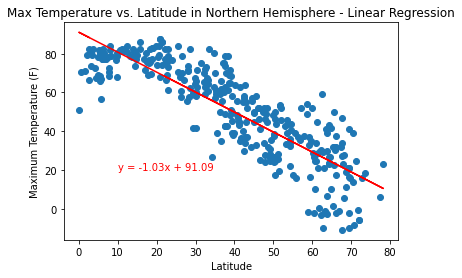

In [19]:
# Plot 5 - 'Max Temperature vs. Latitude' - Linear Regression in the Northern Hemisphere.
# This graph is a more detailed view of the strong correlation temperature and latitude for the Northern Hemisphere.

y_values = Northern["Max Temp"] 
x_values = Northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), color="red")
plt.title("Max Temperature vs. Latitude in Northern Hemisphere - Linear Regression")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot5.png")


The r-squared is: 0.3480753701444759


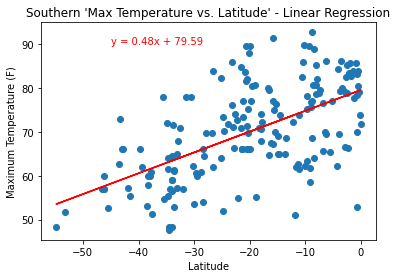

In [27]:
# Plot 6 - code to create linear regression plot for Southern Hemisphere cities.
# This graph is a more detailed view of a weak correlation between temperature and latitude in the Southern Hemisphere.

y_values = Southern["Max Temp"] 
x_values = Southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-45,90), color="red")
plt.title("Southern 'Max Temperature vs. Latitude' - Linear Regression")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot6.png")

The r-squared is: 0.051044580805699034


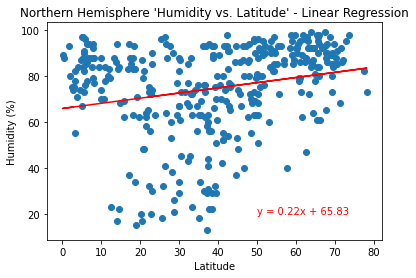

In [29]:
# Plot 7 - code to plot Northern Hemisphere humidity in relationship to latitude.
# This graph shows virtually no correlation between humidity and latitude. R squared < .1

y_values = Northern["Humidity"] 
x_values = Northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,20), color="red")
plt.title("Northern Hemisphere 'Humidity vs. Latitude' - Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot7.png")

The r-squared is: 0.01905823091057088


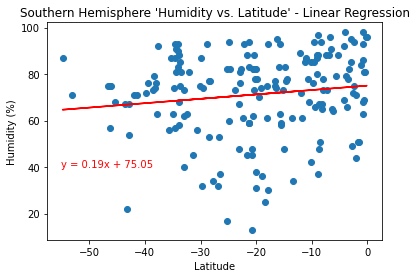

In [28]:
# Plot 8 - code to plot southern hemisphere humidity in relationship to latitude 
# Of the cities for which we have data in the Southern Hemisphere, there is even less correlation between humidity and latitude than in the Northern Hemisphere.

y_values = Southern["Humidity"] 
x_values = Southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,40), color="red")
plt.title("Southern Hemisphere 'Humidity vs. Latitude' - Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot8.png")

The r-squared is: 0.020083102998154204


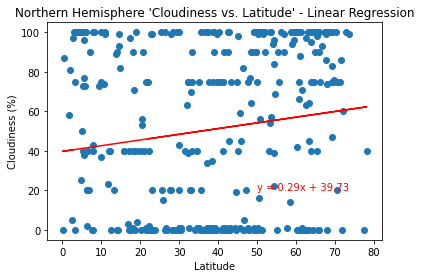

In [23]:
# Plot 9 - code to plot Northern Hemisphere relationship between Cloudiness and Latitude.
# R squared is less than 0.1, no correlation.

y_values = Northern["Cloudiness"] 
x_values = Northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,20), color="red")
plt.title("Northern Hemisphere 'Cloudiness vs. Latitude' - Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot9.png")

The r-squared is: 0.02868588945433066


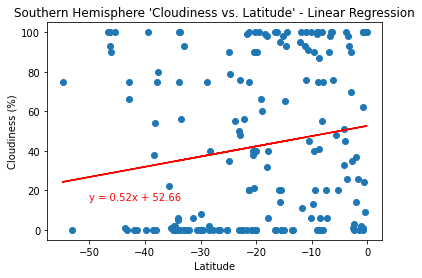

In [24]:
# Plot 10 - code to plot southern hemisphere cloudiness in relationship to latitude 
# No correlation.

y_values = Southern["Cloudiness"] 
x_values = Southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,15), color="red")
plt.title("Southern Hemisphere 'Cloudiness vs. Latitude' - Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot10.png")

The r-squared is: 0.054035078877663255


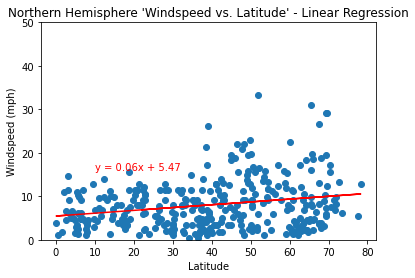

In [25]:
# Plot 11 - code to plot Northern Hemisphere relationship between Windspeed and Latitude.
# No correlation.

y_values = Northern["Windspeed"] 
x_values = Northern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.ylim(0,50)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,16), color="red")
plt.title("Northern Hemisphere 'Windspeed vs. Latitude' - Linear Regression")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot11.png")

The r-squared is: 0.06956347441661652


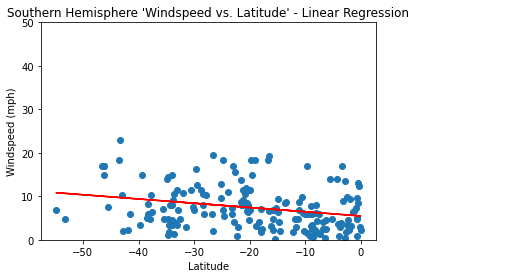

In [26]:
# Plot 12 - code to plot southern hemisphere windspeed in relationship to latitude 
# No correlation.

y_values = Southern["Windspeed"] 
x_values = Southern["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.ylim(0,50)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), color="red")
plt.title("Southern Hemisphere 'Windspeed vs. Latitude' - Linear Regression")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/plot12.png")